## Project:-To find out is anyone clicked on ad or not

In [1]:
import pandas as pd
import numpy as np


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
ad_data=pd.read_csv('advertising.csv')

In [7]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Data_Visualization

Text(0.5, 0, 'Age')

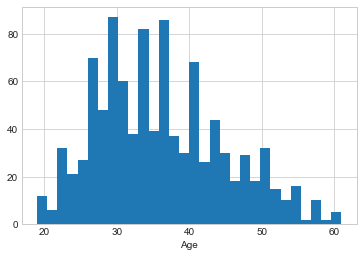

In [19]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

Create a jointplot showing Area Income versus Age.

AttributeError: 'Rectangle' object has no property 'normed'

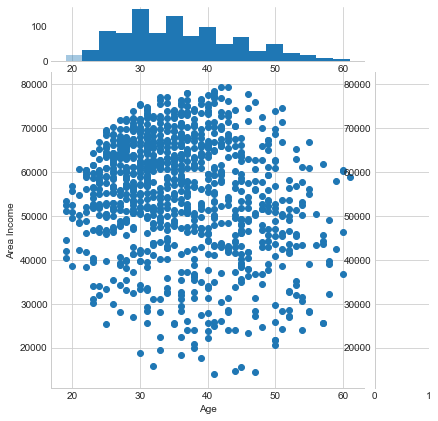

In [22]:
sns.jointplot(x="Age",y="Area Income",data=ad_data)

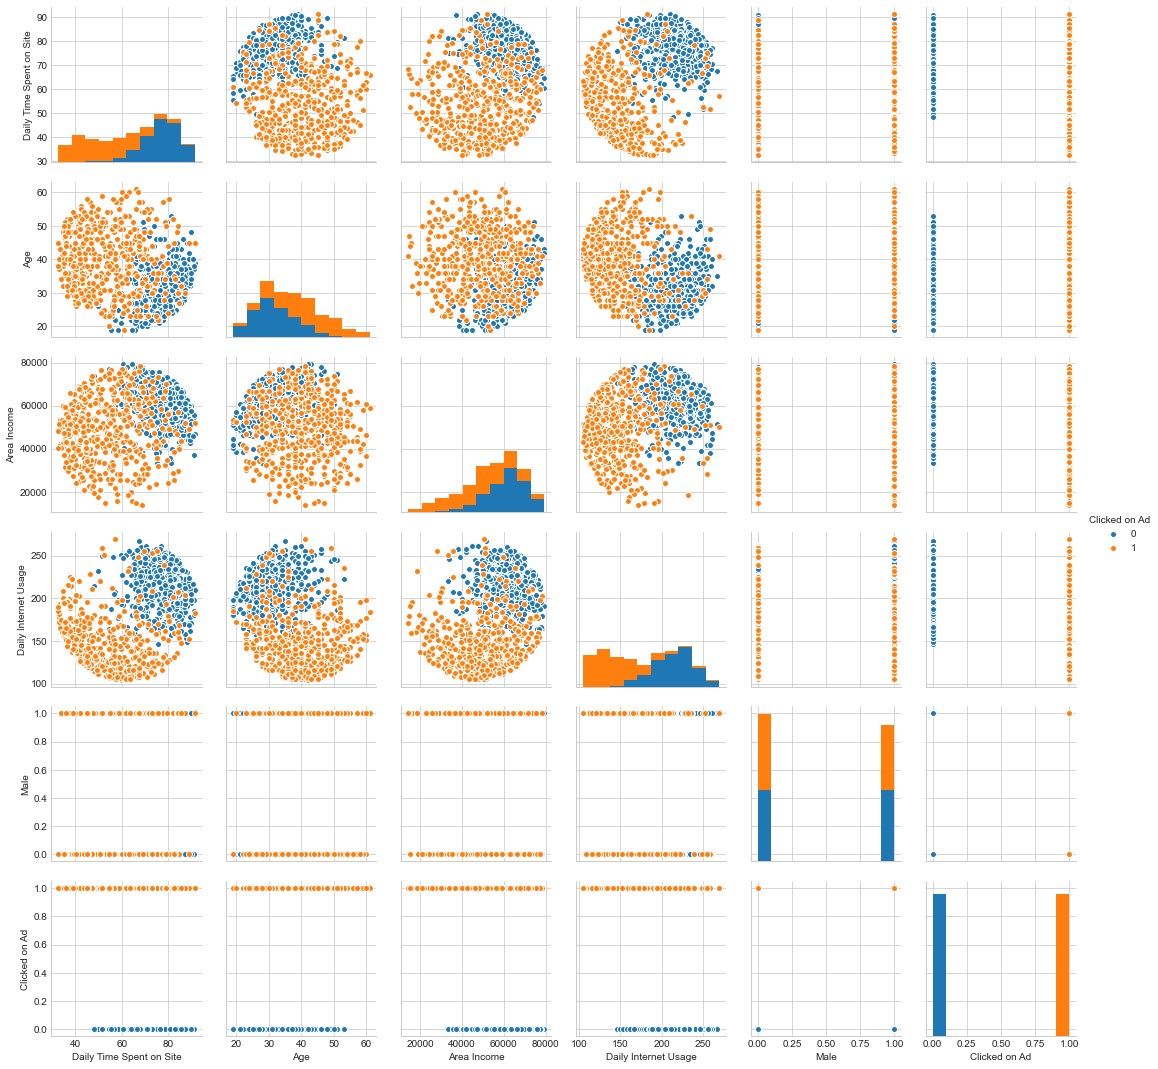

In [40]:
sns.pairplot(data=ad_data,hue='Clicked on Ad')

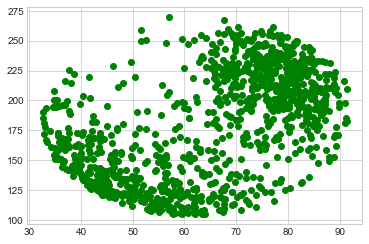

In [32]:
plt.scatter(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

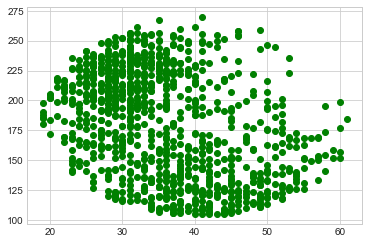

In [34]:
plt.scatter(x='Age',y='Daily Internet Usage',data=ad_data,color='green')

Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

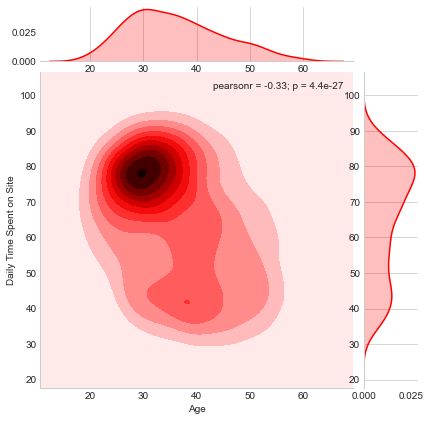

In [37]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

AttributeError: 'Rectangle' object has no property 'normed'

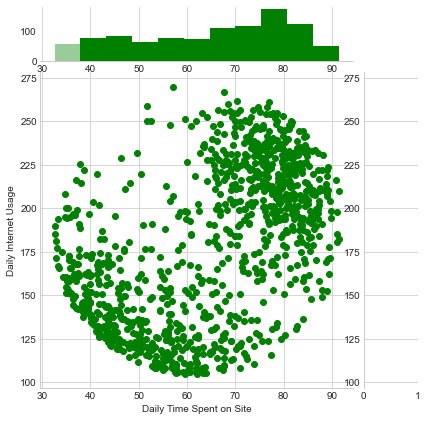

In [38]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

# Logistic Regression

Split the data into training set and testing set 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [46]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]

In [47]:
y=ad_data['Clicked on Ad']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Train and fit logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel=LogisticRegression()

In [51]:
logmodel.fit(X_train,y_train)

LogisticRegression()

# Predictions and Evaluations

In [53]:
predictions=logmodel.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [57]:
logmodel.fit(X,y)

LogisticRegression()

In [66]:
X.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [62]:
sample=[[68.95,35,61833.90,256.09,0]]

In [64]:
logmodel.predict(sample)

array([0], dtype=int64)

In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [68]:
y.iloc[15]

1

In [69]:
X.iloc[15]

Daily Time Spent on Site       63.45
Age                            23.00
Area Income                 52182.23
Daily Internet Usage          140.64
Male                            1.00
Name: 15, dtype: float64

In [105]:
sample2=[[363.66,23.00,52182.23,440.64,0]]

In [106]:
logmodel.predict(sample2)

array([0], dtype=int64)

In [102]:
logmodel.intercept_

array([0.00537494])

In [97]:
logmodel.coef_

array([[-6.20308871e-02,  2.63738754e-01, -1.57050852e-05,
        -2.42586770e-02,  1.78043249e-03]])